In [618]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xg
from sklearn.metrics import mean_absolute_error


%matplotlib inline



In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', None)
import seaborn as sns

from sklearn.metrics import mean_squared_error as rmse_error

# Function to calculate features for new games

- Imports the data
- Groupby Team with rolling averages
- re-sorts dataframe based on old index


In [669]:
#reading in pandas df
df = pd.read_csv('data/initial_testdf.csv')

#dropping 'Unnamed: 0' that should not be there
df.drop('Unnamed: 0', inplace = True, axis = 1)

#reversing the df so that the most recent game with be at the last index so that rolling averages will be calculated with the previous game
df = df.iloc[::-1]
#reseting new index after reversing the df
df.reset_index(inplace = True)

#dropping the old index to clean up the df
df.drop('index', inplace = True, axis = 1)

def move_average(num_game):
    
    '''
    returns a df with the moving averages replacing their actual games stats for each game
    
    '''
    
    #reversing the DF so that the first index is the last date and the last index it the most recent-- > for rolling average to be the previous games
    
    #grouping by 'Team' and creating a df with rolling averages for each column > for both teams 
    moving_ave = round(df.groupby(['Team']).rolling(num_game, min_periods=1).mean(),2).reset_index()
    
    
    #sorting by old index to make indexes = to old indexes so that games line up
    sort_by_old_index = moving_ave.sort_values('level_1')
    
    
    #reseting index to now match with old index and dropping meaningless columns
    reset_to_old_index = sort_by_old_index.reset_index()
    with_moving_average = reset_to_old_index.drop(['index', 'level_1'], axis = 1)
    
    #re_insert old team_2
    with_moving_average['Team_2'] = df['Team_2']
    print(with_moving_average)
    
    #creating the final df with only the averages stats for each team we want
    final_df =  with_moving_average[['Team', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       '+/-', 'Team_2', 'MIN_2', 'PTS_2', 'FGM_2', 'FGA_2', 'FG%_2', '3PM_2', '3PA_2',
       '3P%_2', 'FTM_2', 'FTA_2', 'FT%_2', 'OREB_2', 'DREB_2', 'REB_2',
       'AST_2', 'STL_2', 'BLK_2', 'TOV_2', 'PF_2', '+/-_2']]
    
    final_df[['Total_pts', 'home', 'visitor', 'Open', 'Close', 'Open_2', 'Close_2',
       'over_under', 'totals', 'kappa_1', 'kappa_2', 'kappa_3', 'k_1_under',
       'k_1_over', 'k_2_under', 'k_2_over', 'k_3_under', 'k_3_over']] = df[['Total_pts','home', 'visitor', 'Open', 'Close', 'Open_2', 'Close_2',
       'over_under', 'totals', 'kappa_1', 'kappa_2', 'kappa_3', 'k_1_under',
       'k_1_over', 'k_2_under', 'k_2_over', 'k_3_under', 'k_3_over']]
    
    final_df['Date_x'] = df['Date_x']
    
    #final_df = pd.get_dummies(final_df,  drop_first=True, columns = ['visitor'], dense = True)
    
    return final_df
    
    
    

In [670]:
rolling_data = move_average(2)

     Team    MIN    PTS   FGM   FGA    FG%   3PM   3PA    3P%   FTM   FTA  \
0     GSW  240.0  121.0  43.0  80.0  53.80  16.0  30.0  53.30  19.0  21.0   
1     CLE  240.0  102.0  38.0  83.0  45.80   5.0  22.0  22.70  21.0  25.0   
2     MIN  240.0   99.0  37.0  85.0  43.50   8.0  19.0  42.10  17.0  23.0   
3     POR  240.0  124.0  44.0  90.0  48.90  14.0  24.0  58.30  22.0  28.0   
4     BOS  240.0  100.0  39.0  91.0  42.90  11.0  28.0  39.30  11.0  21.0   
...   ...    ...    ...   ...   ...    ...   ...   ...    ...   ...   ...   
3680  MIL  240.0  116.0  41.5  92.5  45.20  15.5  39.5  39.55  17.5  25.5   
3681  LAC  252.5  115.5  40.0  85.0  47.05  13.0  37.0  35.10  22.5  31.0   
3682  HOU  240.0  100.0  33.5  83.0  40.50  14.0  52.5  26.55  19.0  22.0   
3683  MIA  240.0  102.0  36.0  85.5  42.20  10.5  37.0  28.45  19.5  24.5   
3684  DEN  240.0  115.0  40.5  82.0  49.90  14.5  30.5  49.30  19.5  23.0   

        FT%  OREB  DREB   REB   AST   STL  BLK   TOV    PF   +/-  MIN_2  \


/Users/amossworkcomp/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [671]:
rolling_data 

,Team,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-,Team_2,MIN_2,PTS_2,FGM_2,FGA_2,FG%_2,3PM_2,3PA_2,3P%_2,FTM_2,FTA_2,FT%_2,OREB_2,DREB_2,REB_2,AST_2,STL_2,BLK_2,TOV_2,PF_2,+/-_2,Total_pts,home,visitor,Open,Close,Open_2,Close_2,over_under,totals,kappa_1,kappa_2,kappa_3,k_1_under,k_1_over,k_2_under,k_2_over,k_3_under,k_3_over,Date_x
0,GSW,240.0,121.0,43.0,80.0,53.80,16.0,30.0,53.30,19.0,21.0,90.50,6.0,35.0,41.0,34.0,5.0,9.0,17.0,25.0,-1.0,HOU,240.0,122.0,47.0,97.0,48.50,15.0,41.0,36.60,13.0,19.0,68.40,10.0,33.0,43.0,28.0,9.0,5.0,13.0,16.0,1.0,243,GSW,HOU,232,231.5,9,9,232.0,232.0,4.120514,6.180771,8.241029,228.0,236.0,226.0,238.0,224.0,240.0,2017-10-17
1,CLE,240.0,102.0,38.0,83.0,45.80,5.0,22.0,22.70,21.0,25.0,84.00,9.0,41.0,50.0,19.0,3.0,4.0,17.0,25.0,3.0,BOS,240.0,99.0,36.0,88.0,40.90,8.0,32.0,25.00,19.0,25.0,76.00,9.0,37.0,46.0,24.0,11.0,4.0,12.0,24.0,-3.0,201,CLE,BOS,214.5,216,4,4.5,214.5,214.5,4.120514,6.180771,8.241029,210.0,219.0,208.0,221.0,206.0,223.0,2017-10-17
2,MIN,240.0,99.0,37.0,85.0,43.50,8.0,19.0,42.10,17.0,23.0,73.90,11.0,31.0,42.0,23.0,7.0,4.0,13.0,16.0,-8.0,SAS,240.0,107.0,41.0,89.0,46.10,8.0,21.0,38.10,17.0,19.0,89.50,12.0,38.0,50.0,22.0,8.0,11.0,11.0,18.0,8.0,206,SAS,MIN,207,203.5,3,1.5,207.0,207.0,4.120514,6.180771,8.241029,203.0,211.0,201.0,213.0,199.0,215.0,2017-10-18
3,POR,240.0,124.0,44.0,90.0,48.90,14.0,24.0,58.30,22.0,28.0,78.60,15.0,42.0,57.0,22.0,8.0,7.0,18.0,20.0,48.0,PHX,240.0,76.0,28.0,89.0,31.50,7.0,27.0,25.90,13.0,18.0,72.20,10.0,23.0,33.0,10.0,9.0,8.0,16.0,22.0,-48.0,200,PHX,POR,1,2.5,220,219.5,220.0,220.0,4.120514,6.180771,8.241029,216.0,224.0,214.0,226.0,212.0,228.0,2017-10-18
4,BOS,240.0,100.0,39.0,91.0,42.90,11.0,28.0,39.30,11.0,21.0,52.40,11.0,32.0,43.0,23.0,12.0,2.0,15.0,27.0,-8.0,MIL,240.0,108.0,38.0,76.0,50.00,7.0,21.0,33.30,25.0,30.0,83.30,6.0,39.0,45.0,19.0,6.0,4.0,15.0,22.0,8.0,208,BOS,MIL,208.5,203,6,1.5,208.5,208.5,4.120514,6.180771,8.241029,204.0,213.0,202.0,215.0,200.0,217.0,2017-10-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,MIL,240.0,116.0,41.5,92.5,45.20,15.5,39.5,39.55,17.5,25.5,68.30,9.0,40.0,49.0,26.0,7.0,1.5,15.0,24.0,0.0,MEM,240.0,116.0,42.0,92.5,45.55,12.5,34.0,36.85,19.5,26.5,73.15,10.0,39.5,49.5,29.0,3.0,3.0,14.5,20.5,0.0,225,MEM,MIL,223.5,231,1,4,223.5,223.5,4.120514,6.180771,8.241029,219.0,228.0,217.0,230.0,215.0,232.0,2020-08-13
3681,LAC,252.5,115.5,40.0,85.0,47.05,13.0,37.0,35.10,22.5,31.0,73.75,9.0,41.5,50.5,26.0,10.5,1.5,15.5,23.5,8.5,OKC,252.5,107.0,40.5,96.5,42.60,13.5,39.5,34.45,12.5,20.5,61.15,10.0,35.0,45.0,25.5,4.5,4.5,14.0,24.0,-8.5,210,LAC,OKC,222,224.5,6,3,222.0,222.0,4.120514,6.180771,8.241029,218.0,226.0,216.0,228.0,214.0,230.0,2020-08-14
3682,HOU,240.0,100.0,33.5,83.0,40.50,14.0,52.5,26.55,19.0,22.0,86.60,3.5,34.5,38.0,22.5,9.0,7.5,18.5,19.0,-21.0,PHI,240.0,121.0,44.5,93.5,48.15,14.5,34.5,41.45,17.5,22.0,79.55,10.0,42.5,52.5,28.0,11.5,5.5,15.5,22.0,21.0,230,HOU,PHI,228.5,230.5,4.5,2.5,228.5,228.5,4.120514,6.180771,8.241029,224.0,233.0,222.0,235.0,220.0,237.0,2020-08-14
3683,MIA,240.0,102.0,36.0,85.5,42.20,10.5,37.0,28.45,19.5,24.5,80.25,8.5,34.0,42.5,21.0,6.0,7.0,15.5,18.0,-12.0,IND,240.0,114.0,43.5,90.5,48.05,13.5,35.0,38.50,13.5,15.5,83.85,12.0,39.5,51.5,29.5,8.0,3.5,15.5,24.0,12.0,201,IND,MIA,1,2,216,221.5,216.0,216.0,4.120514,6.180771,8.241029,212.0,220.0,210.0,222.0,208.0,224.0,2020-08-14


In [661]:
rolling_data.head(5)

,Team,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-,Team_2,MIN_2,PTS_2,FGM_2,FGA_2,FG%_2,3PM_2,3PA_2,3P%_2,FTM_2,FTA_2,FT%_2,OREB_2,DREB_2,REB_2,AST_2,STL_2,BLK_2,TOV_2,PF_2,+/-_2,Total_pts,home,visitor,Open,Close,Open_2,Close_2,over_under,totals,kappa_1,kappa_2,kappa_3,k_1_under,k_1_over,k_2_under,k_2_over,k_3_under,k_3_over,Date_x
0,GSW,240.0,121.0,43.0,80.0,53.8,16.0,30.0,53.3,19.0,21.0,90.5,6.0,35.0,41.0,34.0,5.0,9.0,17.0,25.0,-1.0,HOU,240.0,122.0,47.0,97.0,48.5,15.0,41.0,36.6,13.0,19.0,68.4,10.0,33.0,43.0,28.0,9.0,5.0,13.0,16.0,1.0,243,GSW,HOU,232,231.5,9,9,232.0,232.0,4.120514,6.180771,8.241029,228.0,236.0,226.0,238.0,224.0,240.0,2017-10-17
1,CLE,240.0,102.0,38.0,83.0,45.8,5.0,22.0,22.7,21.0,25.0,84.0,9.0,41.0,50.0,19.0,3.0,4.0,17.0,25.0,3.0,BOS,240.0,99.0,36.0,88.0,40.9,8.0,32.0,25.0,19.0,25.0,76.0,9.0,37.0,46.0,24.0,11.0,4.0,12.0,24.0,-3.0,201,CLE,BOS,214.5,216,4,4.5,214.5,214.5,4.120514,6.180771,8.241029,210.0,219.0,208.0,221.0,206.0,223.0,2017-10-17
2,MIN,240.0,99.0,37.0,85.0,43.5,8.0,19.0,42.1,17.0,23.0,73.9,11.0,31.0,42.0,23.0,7.0,4.0,13.0,16.0,-8.0,SAS,240.0,107.0,41.0,89.0,46.1,8.0,21.0,38.1,17.0,19.0,89.5,12.0,38.0,50.0,22.0,8.0,11.0,11.0,18.0,8.0,206,SAS,MIN,207,203.5,3,1.5,207.0,207.0,4.120514,6.180771,8.241029,203.0,211.0,201.0,213.0,199.0,215.0,2017-10-18
3,POR,240.0,124.0,44.0,90.0,48.9,14.0,24.0,58.3,22.0,28.0,78.6,15.0,42.0,57.0,22.0,8.0,7.0,18.0,20.0,48.0,PHX,240.0,76.0,28.0,89.0,31.5,7.0,27.0,25.9,13.0,18.0,72.2,10.0,23.0,33.0,10.0,9.0,8.0,16.0,22.0,-48.0,200,PHX,POR,1,2.5,220,219.5,220.0,220.0,4.120514,6.180771,8.241029,216.0,224.0,214.0,226.0,212.0,228.0,2017-10-18
4,BOS,240.0,100.0,39.0,91.0,42.9,11.0,28.0,39.3,11.0,21.0,52.4,11.0,32.0,43.0,23.0,12.0,2.0,15.0,27.0,-8.0,MIL,240.0,108.0,38.0,76.0,50.0,7.0,21.0,33.3,25.0,30.0,83.3,6.0,39.0,45.0,19.0,6.0,4.0,15.0,22.0,8.0,208,BOS,MIL,208.5,203,6,1.5,208.5,208.5,4.120514,6.180771,8.241029,204.0,213.0,202.0,215.0,200.0,217.0,2017-10-18


In [632]:
df

,Team,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-,Date_x,Team_2,MIN_2,PTS_2,FGM_2,FGA_2,FG%_2,3PM_2,3PA_2,3P%_2,FTM_2,FTA_2,FT%_2,OREB_2,DREB_2,REB_2,AST_2,STL_2,BLK_2,TOV_2,PF_2,+/-_2,Total_pts,home,visitor,Open,Close,Open_2,Close_2,over_under,totals,kappa_1,kappa_2,kappa_3,k_1_under,k_1_over,k_2_under,k_2_over,k_3_under,k_3_over
0,GSW,240,121,43,80,53.8,16,30,53.3,19,21,90.5,6,35,41,34,5,9,17,25,-1,2017-10-17,HOU,240,122,47,97,48.5,15,41,36.6,13,19,68.4,10,33,43,28,9,5,13,16,1,243,GSW,HOU,232,231.5,9,9,232.0,232.0,4.120514,6.180771,8.241029,228.0,236.0,226.0,238.0,224.0,240.0
1,CLE,240,102,38,83,45.8,5,22,22.7,21,25,84.0,9,41,50,19,3,4,17,25,3,2017-10-17,BOS,240,99,36,88,40.9,8,32,25.0,19,25,76.0,9,37,46,24,11,4,12,24,-3,201,CLE,BOS,214.5,216,4,4.5,214.5,214.5,4.120514,6.180771,8.241029,210.0,219.0,208.0,221.0,206.0,223.0
2,MIN,240,99,37,85,43.5,8,19,42.1,17,23,73.9,11,31,42,23,7,4,13,16,-8,2017-10-18,SAS,240,107,41,89,46.1,8,21,38.1,17,19,89.5,12,38,50,22,8,11,11,18,8,206,SAS,MIN,207,203.5,3,1.5,207.0,207.0,4.120514,6.180771,8.241029,203.0,211.0,201.0,213.0,199.0,215.0
3,POR,240,124,44,90,48.9,14,24,58.3,22,28,78.6,15,42,57,22,8,7,18,20,48,2017-10-18,PHX,240,76,28,89,31.5,7,27,25.9,13,18,72.2,10,23,33,10,9,8,16,22,-48,200,PHX,POR,1,2.5,220,219.5,220.0,220.0,4.120514,6.180771,8.241029,216.0,224.0,214.0,226.0,212.0,228.0
4,BOS,240,100,39,91,42.9,11,28,39.3,11,21,52.4,11,32,43,23,12,2,15,27,-8,2017-10-18,MIL,240,108,38,76,50.0,7,21,33.3,25,30,83.3,6,39,45,19,6,4,15,22,8,208,BOS,MIL,208.5,203,6,1.5,208.5,208.5,4.120514,6.180771,8.241029,204.0,213.0,202.0,215.0,200.0,217.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,MIL,240,106,39,98,39.8,13,41,31.7,15,23,65.2,9,36,45,27,8,3,15,22,-13,2020-08-13,MEM,240,119,45,90,50.0,13,33,39.4,16,23,69.6,9,46,55,36,4,3,18,18,13,225,MEM,MIL,223.5,231,1,4,223.5,223.5,4.120514,6.180771,8.241029,219.0,228.0,217.0,230.0,215.0,232.0
3681,LAC,265,107,34,85,40.0,12,37,32.4,27,39,69.2,12,49,61,23,10,2,23,22,4,2020-08-14,OKC,265,103,38,106,35.8,14,44,31.8,13,22,59.1,11,37,48,18,5,6,16,29,-4,210,LAC,OKC,222,224.5,6,3,222.0,222.0,4.120514,6.180771,8.241029,218.0,226.0,216.0,228.0,214.0,230.0
3682,HOU,240,96,35,80,43.8,12,48,25.0,14,16,87.5,1,26,27,25,10,9,17,18,-38,2020-08-14,PHI,240,134,49,87,56.3,18,38,47.4,18,22,81.8,8,43,51,31,8,4,16,19,38,230,HOU,PHI,228.5,230.5,4.5,2.5,228.5,228.5,4.120514,6.180771,8.241029,224.0,233.0,222.0,235.0,220.0,237.0
3683,MIA,240,92,31,87,35.6,10,38,26.3,20,27,74.1,14,34,48,14,6,5,19,15,-17,2020-08-14,IND,240,109,43,89,48.3,15,38,39.5,8,11,72.7,12,39,51,32,11,3,20,27,17,201,IND,MIA,1,2,216,221.5,216.0,216.0,4.120514,6.180771,8.241029,212.0,220.0,210.0,222.0,208.0,224.0


# Creating the X variable for our features and the y for your target variable

In [672]:
#creating the features to begin the initial testing
X = rolling_data[['PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       '+/-', 'MIN_2', 'PTS_2', 'FGM_2', 'FGA_2', 'FG%_2',
       '3PM_2', '3PA_2', '3P%_2', 'FTM_2', 'FTA_2', 'FT%_2', 'OREB_2',
       'DREB_2', 'REB_2', 'AST_2', 'STL_2', 'BLK_2', 'TOV_2', 'PF_2', '+/-_2']]


#creating the y (target variable)
y = rolling_data['Total_pts']


# train_test_split

In [673]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initial testing of random forest 

In [674]:
#running my initial regression
rf = RandomForestRegressor()
rf_fit = rf.fit(X_train, y_train)
y_pred = rf_fit.predict(X_test)


# rmse = 1.6987287652645893    something is very wrong with this ? have a discussion with the teacher.... 

In [675]:
rmse = rmse_error(y_test, y_pred)
rmse

183.48080230664854

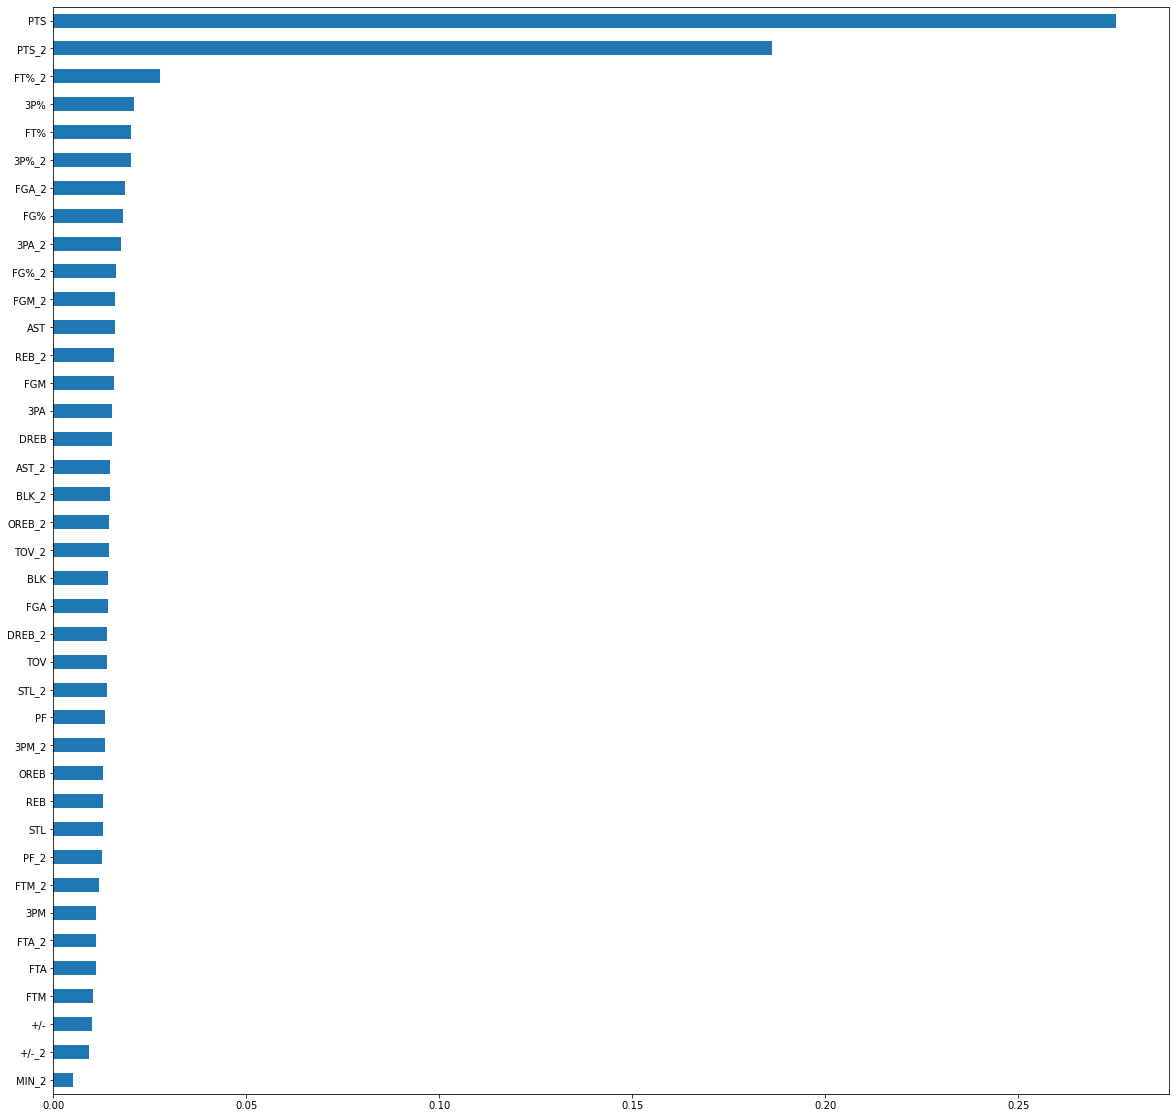

In [641]:
#graphing to see some of the feature importance
rf_fit.feature_importances_

feature_importance = pd.Series(rf_fit.feature_importances_, index= X.columns)
feature_importance.sort_values(inplace = True)
feature_importance.plot(kind = 'barh', figsize=(20,20))

In [642]:
acc_list = []
zipped = zip(y_test, y_pred, rolling_data['over_under'])
for x in zipped:
    if x[0] > x[2] and x[1] > x[2]:
        acc_list.append('over')
    if x[0] < x[2] and x[1] < x[2]:
        acc_list.append('under')
    else:
        acc_list.append('lost')
    


In [643]:
lost = []
for item in acc_list:
    if item == 'lost':
        lost.append(item)

In [644]:
print ((len(acc_list) - len(lost)) / len(acc_list))

0.49493243243243246


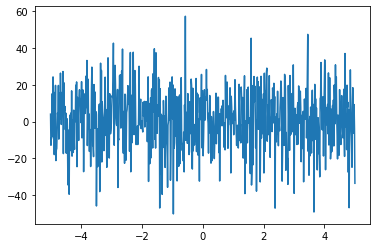

In [601]:
plt.plot(space, y_pred-y_test)

# initial testing of gradient boost 

In [656]:
gb = GradientBoostingRegressor(learning_rate=0.05, max_depth=4, max_features='auto',
                          min_samples_leaf=2, n_estimators=50)
gb_fit = gb.fit(X_train, y_train)
y_pred = gb_fit.predict(X_test)

In [657]:
rmse = rmse_error(y_test, y_pred)
rmse


312.09440550397073

In [654]:
#calculate winning percentage based on both the target and predicted score are on the same side of the spread Over/Under
acc_list = []
zipped = zip(y_test, y_pred, rolling_data['over_under'])
for x in zipped:
    if x[0] > x[2] and x[1] > x[2]:
        acc_list.append('over')
    if x[0] < x[2] and x[1] < x[2]:
        acc_list.append('under')
    else:
        acc_list.append('lost')
    
lost = []
for item in acc_list:
    if item == 'lost':
        lost.append(item)

print ((len(acc_list) - len(lost)) / len(acc_list))

0.47368421052631576


# Implementing a grid search to include cross val

In [566]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


#maybe use this for cross val later
#from sklearn.model_selection import cross_val_score
#all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

In [655]:


param_grid={'n_estimators':[50,75, 100, 150, 200, 250], 
            'learning_rate': [.2, 0.1,0.05,0.02],
            'max_depth':[4 ], 
            'min_samples_leaf': [2,4,6], 
            'max_features':['auto', 1, 3, 5, 10] }

gradient = GradientBoostingRegressor() 
pipe = GridSearchCV(estimator=gradient, cv=10, param_grid=param_grid, 
    n_jobs=-1)

In [608]:
pipe.fit(X_train, y_train)

KeyboardInterrupt: 

## Below are the results for best estimators in gradient boost

### results 
- RMSE = 255.7571029854123
- Betting winning percentage over/under = 0.5744016649323621

In [605]:
pipe.best_estimator_  = GradientBoostingRegressor(learning_rate=0.05, max_depth=4, max_features='auto',
                          min_samples_leaf=2, n_estimators=50)

In [606]:
y_pred = pipe.predict(X_test)

NotFittedError: This GradientBoostingRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [576]:
y_pred = pipe.predict(X_test)

NotFittedError: This GradientBoostingRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [634]:
rmse = rmse_error(y_test, y_pred)
print ( rmse)

mae = mean_absolute_error(y_test, y_pred)

print (mae)

acc_list = []
zipped = zip(y_test, y_pred, rolling_data['over_under'])
for x in zipped:
    if x[0] > x[2] and x[1] > x[2]:
        acc_list.append('over')
    if x[0] < x[2] and x[1] < x[2]:
        acc_list.append('under')
    else:
        acc_list.append('lost')
    
lost = []
for item in acc_list:
    if item == 'lost':
        lost.append(item)

print ((len(acc_list) - len(lost)) / len(acc_list))

255.35434250971346
12.551113941290971
0.494949494949495


# Creating a profit function the testing data

## Details 
- Every game won is +100
- Every game lossed is -110


# Profit results

## If we were to bet on everysingle game in the NBA from 2017 - 2020 risking 115 to win 100 our profits would be $8,165.00 with a 57% winning percentage

In [658]:
def calculating_profit():
    
    results_list = []
    zipped = zip(y_test, y_pred, rolling_data['totals'])
    for x in zipped:
        if x[0] > x[2] and x[1] > x[2]:
            results_list.append(100)
        if x[0] < x[2] and x[1] < x[2]:
            results_list.append(100)
        else:
            results_list.append(-115)

     
    profit = 0
    for num in results_list:
        profit += num
    return profit


print (calculating_profit())        

-16615


In [616]:
rolling_data

,Team,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-,Team_2,MIN_2,PTS_2,FGM_2,FGA_2,FG%_2,3PM_2,3PA_2,3P%_2,FTM_2,FTA_2,FT%_2,OREB_2,DREB_2,REB_2,AST_2,STL_2,BLK_2,TOV_2,PF_2,+/-_2,Total_pts,home,visitor,Open,Close,Open_2,Close_2,over_under,totals,kappa_1,kappa_2,kappa_3,k_1_under,k_1_over,k_2_under,k_2_over,k_3_under,k_3_over,Date_x
0,GSW,240.00,121.00,43.00,80.00,53.80,16.00,30.00,53.30,19.00,21.00,90.50,6.00,35.00,41.00,34.00,5.00,9.00,17.00,25.00,-1.00,HOU,240.00,122.00,47.00,97.00,48.50,15.00,41.00,36.60,13.00,19.00,68.40,10.00,33.00,43.00,28.00,9.00,5.00,13.00,16.00,1.00,243,GSW,HOU,232,231.5,9,9,232.0,232.0,4.120514,6.180771,8.241029,228.0,236.0,226.0,238.0,224.0,240.0,2017-10-17
1,CLE,240.00,102.00,38.00,83.00,45.80,5.00,22.00,22.70,21.00,25.00,84.00,9.00,41.00,50.00,19.00,3.00,4.00,17.00,25.00,3.00,BOS,240.00,99.00,36.00,88.00,40.90,8.00,32.00,25.00,19.00,25.00,76.00,9.00,37.00,46.00,24.00,11.00,4.00,12.00,24.00,-3.00,201,CLE,BOS,214.5,216,4,4.5,214.5,214.5,4.120514,6.180771,8.241029,210.0,219.0,208.0,221.0,206.0,223.0,2017-10-17
2,MIN,240.00,99.00,37.00,85.00,43.50,8.00,19.00,42.10,17.00,23.00,73.90,11.00,31.00,42.00,23.00,7.00,4.00,13.00,16.00,-8.00,SAS,240.00,107.00,41.00,89.00,46.10,8.00,21.00,38.10,17.00,19.00,89.50,12.00,38.00,50.00,22.00,8.00,11.00,11.00,18.00,8.00,206,SAS,MIN,207,203.5,3,1.5,207.0,207.0,4.120514,6.180771,8.241029,203.0,211.0,201.0,213.0,199.0,215.0,2017-10-18
3,POR,240.00,124.00,44.00,90.00,48.90,14.00,24.00,58.30,22.00,28.00,78.60,15.00,42.00,57.00,22.00,8.00,7.00,18.00,20.00,48.00,PHX,240.00,76.00,28.00,89.00,31.50,7.00,27.00,25.90,13.00,18.00,72.20,10.00,23.00,33.00,10.00,9.00,8.00,16.00,22.00,-48.00,200,PHX,POR,1,2.5,220,219.5,220.0,220.0,4.120514,6.180771,8.241029,216.0,224.0,214.0,226.0,212.0,228.0,2017-10-18
4,BOS,240.00,100.00,39.00,91.00,42.90,11.00,28.00,39.30,11.00,21.00,52.40,11.00,32.00,43.00,23.00,12.00,2.00,15.00,27.00,-8.00,MIL,240.00,108.00,38.00,76.00,50.00,7.00,21.00,33.30,25.00,30.00,83.30,6.00,39.00,45.00,19.00,6.00,4.00,15.00,22.00,8.00,208,BOS,MIL,208.5,203,6,1.5,208.5,208.5,4.120514,6.180771,8.241029,204.0,213.0,202.0,215.0,200.0,217.0,2017-10-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,MIL,240.00,120.67,41.33,87.67,47.67,15.33,38.67,39.87,22.67,29.67,74.47,7.67,39.67,47.33,26.33,7.00,2.00,14.67,23.00,4.67,MEM,240.00,116.00,39.67,89.33,44.43,15.33,38.00,39.80,21.33,26.67,79.63,8.67,37.33,46.00,28.67,4.00,2.33,16.00,23.00,-4.67,225,MEM,MIL,223.5,231,1,4,223.5,223.5,4.120514,6.180771,8.241029,219.0,228.0,217.0,230.0,215.0,232.0,2020-08-13
3681,LAC,248.33,117.67,40.67,85.00,47.83,13.67,36.00,38.10,22.67,30.00,76.53,9.00,39.67,48.67,25.33,8.67,1.67,15.00,23.00,7.33,OKC,248.33,110.33,41.67,94.33,44.70,14.67,40.67,36.13,12.33,19.33,64.30,9.67,34.00,43.67,25.00,4.67,3.67,13.00,24.67,-7.33,210,LAC,OKC,222,224.5,6,3,222.0,222.0,4.120514,6.180771,8.241029,218.0,226.0,216.0,228.0,214.0,230.0,2020-08-14
3682,HOU,240.00,101.67,34.33,85.00,40.47,14.00,51.00,27.43,19.00,21.67,87.90,3.67,34.00,37.67,21.00,10.67,6.00,18.33,19.00,-20.00,PHI,240.00,121.67,45.00,93.33,48.60,14.00,33.67,41.17,17.67,21.33,83.03,9.67,45.00,54.67,28.00,11.00,5.33,17.67,21.33,20.00,230,HOU,PHI,228.5,230.5,4.5,2.5,228.5,228.5,4.120514,6.180771,8.241029,224.0,233.0,222.0,235.0,220.0,237.0,2020-08-14
3683,MIA,240.00,102.33,36.33,86.00,42.30,11.67,39.67,29.33,18.00,21.67,84.77,8.33,33.67,42.00,23.67,7.00,7.33,15.33,20.00,-9.33,IND,240.00,111.67,38.67,82.67,46.47,14.33,34.00,42.33,20.00,22.33,86.47,9.00,38.33,47.33,26.00,7.33,3.33,17.33,22.33,9.33,201,IND,MIA,1,2,216,221.5,216.0,216.0,4.120514,6.180771,8.241029,212.0,220.0,210.0,222.0,208.0,224.0,2020-08-14


# Initial testing of xgboost

### Moving forward we are going to stick with Gradient Boost because is out performed Random Forest and XGboost in initial testing.

#### results 

- RMSE = 258.13753242634635
- Betting winning percentage over/under = 0.5610010427528676

In [619]:
# Instantiation
xg = xg.XGBRegressor(seed = 42)
xg_fit = xg.fit(X_train, y_train)
y_pred = xg_fit.predict(X_test)

In [620]:
rmse = rmse_error(y_test, y_pred)
rmse

255.35434250971346

In [622]:
#checking to see how accurate the predictions are in terms of over under. 
acc_list = []
zipped = zip(y_test, y_pred, rolling_data['totals'])
for x in zipped:
    if x[0] > x[2] and x[1] > x[2]:
        acc_list.append('over')
    if x[0] < x[2] and x[1] < x[2]:
        acc_list.append('under')
    else:
        acc_list.append('lost')
    
lost = []
for item in acc_list:
    if item == 'lost':
        lost.append(item)

print ((len(acc_list) - len(lost)) / len(acc_list))

0.493859649122807


In [677]:
moving_ave = round(df.groupby(['Team']).rolling(3, min_periods=1).mean(),2).reset_index()

In [680]:
moving_ave

,Team,level_1,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-,MIN_2,PTS_2,FGM_2,FGA_2,FG%_2,3PM_2,3PA_2,3P%_2,FTM_2,FTA_2,FT%_2,OREB_2,DREB_2,REB_2,AST_2,STL_2,BLK_2,TOV_2,PF_2,+/-_2,Total_pts,over_under,totals,kappa_1,kappa_2,kappa_3,k_1_under,k_1_over,k_2_under,k_2_over,k_3_under,k_3_over
0,ATL,23,240.0,91.00,36.00,95.00,37.90,7.00,30.00,23.30,12.00,14.00,85.70,6.00,32.00,38.00,19.00,11.00,4.00,13.00,29.00,-18.00,240.0,109.00,37.00,86.00,43.00,11.00,36.00,30.60,24.00,30.00,80.00,12.00,45.00,57.00,17.00,5.00,4.00,21.00,18.00,18.00,200.00,202.50,202.50,4.12,6.18,8.24,198.00,207.00,196.00,209.00,194.00,211.00
1,ATL,39,240.0,97.50,34.00,94.50,35.95,7.00,28.50,24.60,22.50,25.00,88.70,11.00,32.00,43.00,20.00,8.50,3.00,14.50,27.00,-15.00,240.0,112.50,39.00,86.50,45.05,11.00,31.50,35.65,23.50,32.00,73.80,12.50,41.50,54.00,22.00,8.50,6.00,19.50,22.50,15.00,210.00,211.00,211.00,4.12,6.18,8.24,206.50,215.50,204.50,217.50,202.50,219.50
2,ATL,67,240.0,93.67,33.33,90.00,37.13,8.33,28.33,29.50,18.67,21.00,87.33,9.67,32.33,42.00,20.67,9.00,3.67,13.00,25.67,-11.67,240.0,105.33,36.33,86.33,42.03,9.67,31.67,31.07,23.00,31.00,74.50,14.33,42.33,56.67,21.33,7.33,5.33,18.33,20.00,11.67,199.00,207.17,207.17,4.12,6.18,8.24,202.67,211.67,200.67,213.67,198.67,215.67
3,ATL,91,240.0,98.67,33.33,84.00,40.10,10.33,28.00,36.67,21.67,25.00,85.70,8.67,31.00,39.67,23.33,8.33,3.00,14.00,23.00,-9.33,240.0,108.00,38.67,84.67,45.80,10.33,28.33,37.53,20.33,28.00,73.23,12.00,40.00,52.00,25.67,8.67,5.00,16.00,23.00,9.33,206.67,141.50,207.33,4.12,6.18,8.24,203.00,211.67,201.00,213.67,199.00,215.67
4,ATL,107,240.0,100.33,36.33,84.00,43.30,10.67,26.67,39.63,17.00,22.00,78.60,7.33,32.67,40.00,23.67,10.00,3.67,14.67,24.00,-8.67,240.0,109.00,40.33,88.67,45.60,11.00,31.00,36.33,17.33,25.00,69.37,12.67,40.00,52.67,28.67,8.00,3.67,15.33,22.67,8.67,209.33,138.33,204.17,4.12,6.18,8.24,200.00,208.33,198.00,210.33,196.00,212.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,WAS,3614,240.0,116.67,40.67,85.33,47.90,15.67,32.67,48.50,19.67,24.67,75.03,5.33,31.33,36.67,27.33,8.67,5.67,13.33,20.33,-1.33,240.0,118.00,45.33,90.00,50.40,9.67,27.67,34.60,17.67,21.33,84.70,11.67,34.67,46.33,22.67,8.67,6.67,15.67,21.00,1.33,234.67,149.17,224.00,4.12,6.18,8.24,220.00,228.00,218.00,230.00,216.00,232.00
3681,WAS,3615,240.0,108.67,41.00,89.33,46.17,12.67,32.67,38.50,14.00,20.00,63.33,6.67,33.67,40.33,29.33,7.33,6.33,13.33,20.00,-9.67,240.0,118.33,46.00,91.00,50.60,9.00,27.00,32.87,17.33,18.67,94.43,8.67,35.33,44.00,21.00,8.33,8.00,11.67,18.00,9.67,227.00,149.83,223.17,4.12,6.18,8.24,219.00,227.33,217.00,229.33,215.00,231.33
3682,WAS,3630,240.0,99.33,39.33,91.00,43.20,9.67,27.00,35.57,11.00,16.67,62.27,9.00,37.00,46.00,25.67,6.67,6.33,13.67,21.33,-10.33,240.0,109.67,42.00,88.67,47.30,8.33,27.00,30.57,17.33,20.33,89.67,8.00,35.67,43.67,22.33,7.67,8.67,11.33,17.00,10.33,209.00,75.67,149.00,4.12,6.18,8.24,144.67,153.33,142.67,155.33,140.67,157.33
3683,WAS,3643,240.0,101.67,38.33,89.67,42.73,9.33,26.00,35.67,15.67,20.00,74.77,9.33,35.00,44.33,23.00,7.67,5.33,14.67,24.00,-10.33,240.0,112.00,41.33,87.33,47.27,10.00,30.00,33.03,19.33,23.67,84.53,8.67,35.00,43.67,24.00,8.00,7.67,14.67,18.33,10.33,213.67,83.00,156.33,4.12,6.18,8.24,152.00,160.67,150.00,162.67,148.00,164.67
